# EDA OF HEART ATTACK DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv(r"C:\Users\SACHIN\OneDrive\Desktop\ML\Heart attack EDA\heart_attack_dataset.csv",encoding='ISO-8859-1')

In [3]:
dataset.head(5)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Had_HeartAttack
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes,no
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty,yes
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty,yes
3,Male,84,106,270,No,Never,Atypical Angina,CABG,yes
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication,no


Age: The age of the patient.

Sex: The gender of the patient.

Blood Pressure: The patient's resting blood pressure in mm Hg.

Cholesterol: The patient's serum cholesterol level in mg/dl.

Diabetes status (Has diabetes): Indicates whether the patient has diabetes or not.

Smoking status: Indicates whether the patient have smoking habit or not.

Chest pain type: The type of chest pain the patient had. (Non-anginal Pain, Asymptomatic, Typical Angina, Atypical Angina)

Treatment: The patient has to undergo specified treatment for recovery. (Lifestyle Changes, Coronary Artery Bypass Graft (CABG), Angioplasty, Medication)  

HeartAttack status: Indicates the presence of heart disease .

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
 8   Had_HeartAttack        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [5]:
dataset.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
Had_HeartAttack          0
dtype: int64

There are no missing values.

In [6]:
dataset.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.347000,145.440000,223.789000
std,17.330578,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,90.000000,199.000000,299.000000


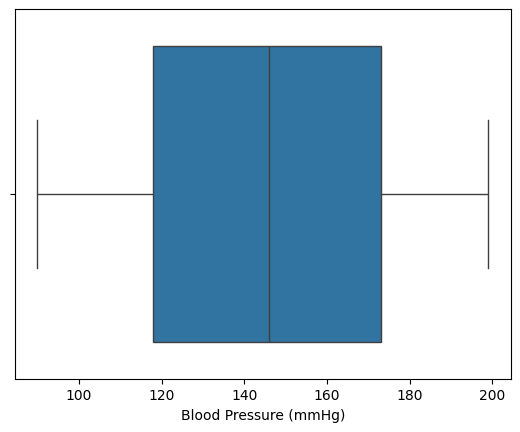

In [7]:
sns.boxplot(x="Blood Pressure (mmHg)",data=dataset)
plt.show()

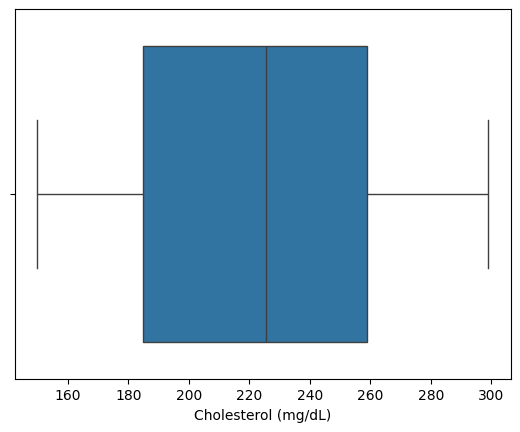

In [32]:
sns.boxplot(x="Cholesterol (mg/dL)",data=dataset)
plt.show()

There are no outliers.

In [8]:
print(dataset['Age'].max())

90


In [9]:
print(dataset['Age'].min())

30


In [10]:
labels = ["{0} - {1}".format(i,i+9) for i in range(30,90,10)]
print(labels)

['30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89']


In [11]:
labels = ["{0} - {1}".format(i,i+9) for i in range(30,90,10)]
dataset['Age_group']=pd.cut(dataset.Age,range(30,99,10),right=False,labels=labels)

In [12]:
dataset['Age_group'].value_counts()

Age_group
70 - 79    186
80 - 89    178
40 - 49    176
50 - 59    157
30 - 39    152
60 - 69    150
Name: count, dtype: int64

In [13]:
dataset.head(5)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Had_HeartAttack,Age_group
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes,no,70 - 79
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty,yes,50 - 59
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty,yes,40 - 49
3,Male,84,106,270,No,Never,Atypical Angina,CABG,yes,80 - 89
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication,no,80 - 89


In [14]:
dataset['Had_HeartAttack'].value_counts()

Had_HeartAttack
no     501
yes    499
Name: count, dtype: int64

Text(0, 0.5, 'Target variables')

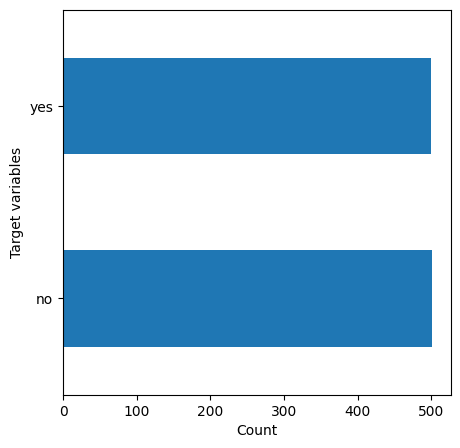

In [15]:
dataset['Had_HeartAttack'].value_counts().plot(kind='barh',figsize=(5,5))
plt.xlabel("Count")
plt.ylabel("Target variables")

The patients having heart attack is about 501.

The patients having heart attack is about 499.

*CATEGORICAL ANALYSIS*

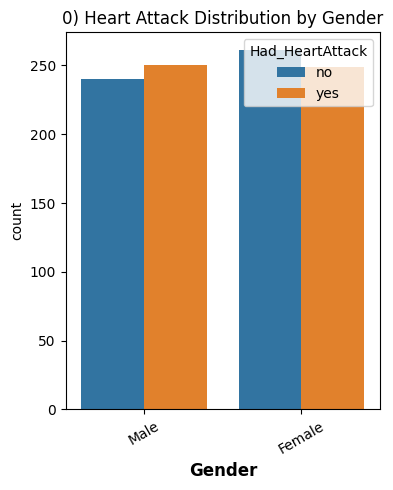

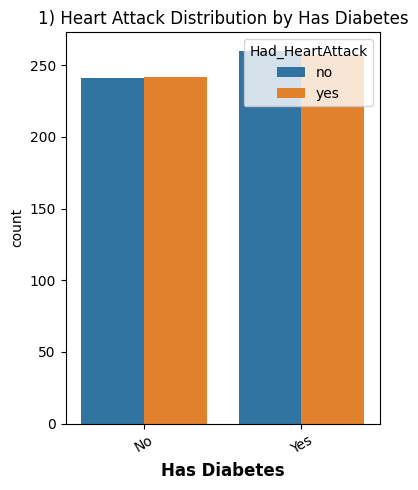

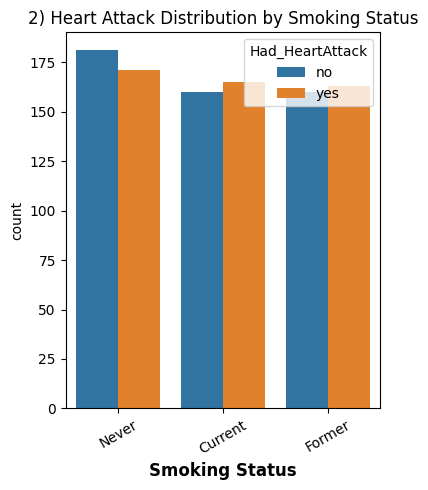

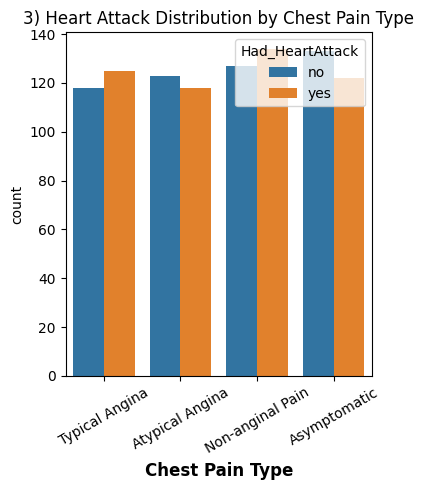

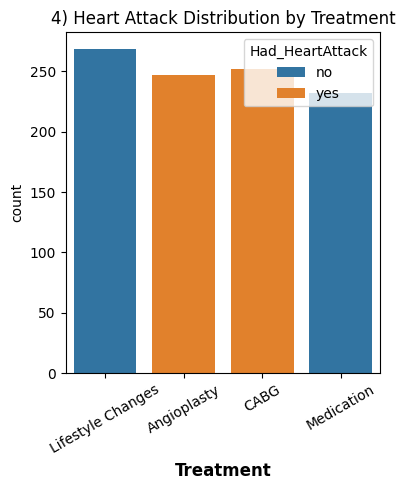

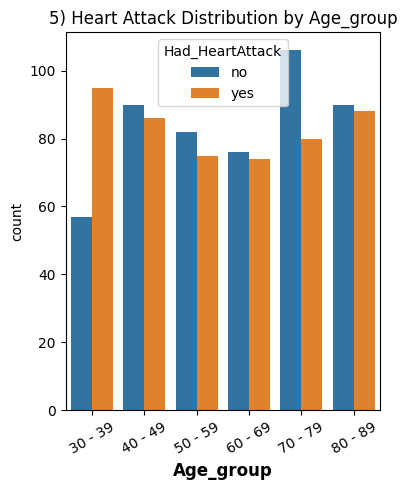

In [16]:
for i, predictor in enumerate(dataset.drop(columns=['Had_HeartAttack','Age','Blood Pressure (mmHg)','Cholesterol (mg/dL)'])):
    plt.figure(i,figsize=(4,5))
    sns.countplot(data=dataset,x=predictor,hue='Had_HeartAttack')
    plt.title(f'{i}) Heart Attack Distribution by {predictor}')
    plt.xlabel(predictor,fontsize=12,fontweight='bold')
    plt.xticks(rotation=30)
    plt.tight_layout()

Insights :-

0 ) There is no much difference in the heart attack ratio between the genders. Only a slight elevation in the males compared to females.

1 ) There's no much insights available.

2 ) Though the ratios vary by small margin between never, current and former patients, it insights that patients who were current or former smokers have high chance of heart attack than those patients who never smoke.

3 ) Typical angina and non-anginal pain have an elevation in ratio compared to Atypical angina and Asymptomatic chest pains.

4 ) There is no insights as the ratio of No heart attack treatment to Heart attack treatment is 1:1. 

5 ) The key insight here is that, age group (30 - 39) has the most heart attack cases. Age group (70 - 79) has the least heart attack cases in terms of ratio.  

In [17]:
dataset['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [18]:
new_dataset=dataset.copy()

In [19]:
new_dataset['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [20]:
new_dataset1_target0=new_dataset[new_dataset['Had_HeartAttack']=='no']
new_dataset1_target1=new_dataset[new_dataset['Had_HeartAttack']=='yes']

In [21]:
new_dataset1_target1.Gender.value_counts()

Gender
Male      250
Female    249
Name: count, dtype: int64

In [22]:
pd.crosstab(new_dataset['Chest Pain Type'],new_dataset.Had_HeartAttack)

Had_HeartAttack,no,yes
Chest Pain Type,,
Asymptomatic,133,122
Atypical Angina,123,118
Non-anginal Pain,127,134
Typical Angina,118,125


In [23]:
new_dataset.Had_HeartAttack=np.where(new_dataset.Had_HeartAttack == 'yes',1,0)

In [24]:
new_dataset.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Had_HeartAttack,Age_group
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes,0,70 - 79
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty,1,50 - 59
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty,1,40 - 49
3,Male,84,106,270,No,Never,Atypical Angina,CABG,1,80 - 89
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication,0,80 - 89


In [25]:
new_dataset_dummy=pd.get_dummies(new_dataset)
new_dataset_dummy.head()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Had_HeartAttack,Gender_Female,Gender_Male,Has Diabetes_No,Has Diabetes_Yes,Smoking Status_Current,Smoking Status_Former,...,Treatment_Angioplasty,Treatment_CABG,Treatment_Lifestyle Changes,Treatment_Medication,Age_group_30 - 39,Age_group_40 - 49,Age_group_50 - 59,Age_group_60 - 69,Age_group_70 - 79,Age_group_80 - 89
0,70,181,262,0,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,55,103,253,1,True,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,42,95,295,1,False,True,False,True,True,False,...,True,False,False,False,False,True,False,False,False,False
3,84,106,270,1,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,86,187,296,0,False,True,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True


*NUMERICAL ANALYSIS*

Relationship between Blood pressure & Cholesterol

In [26]:
print(new_dataset_dummy['Cholesterol (mg/dL)'].corr(new_dataset_dummy['Blood Pressure (mmHg)']))

0.044315862487448635


The insight here is that, Cholesterol increases with increase in Blood Pressure or vice-versa. (It is positively co-related)

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2440\125600512.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_dataset_dummy['Blood Pressure (mmHg)'][(new_dataset_dummy['Had_HeartAttack']==0)],color="red",shade=True)
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2440\125600512.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_dataset_dummy['Blood Pressure (mmHg)'][(new_dataset_dummy['Had_HeartAttack']==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Blood pressure by heart attack')

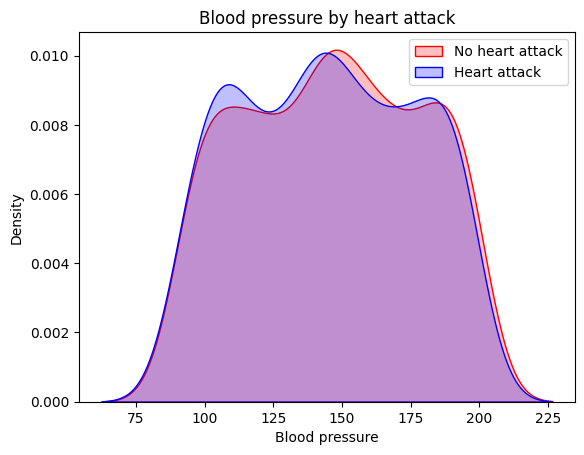

In [27]:
sns.kdeplot(new_dataset_dummy['Blood Pressure (mmHg)'][(new_dataset_dummy['Had_HeartAttack']==0)],color="red",shade=True)
sns.kdeplot(new_dataset_dummy['Blood Pressure (mmHg)'][(new_dataset_dummy['Had_HeartAttack']==1)],color="blue",shade=True)
plt.legend(["No heart attack","Heart attack"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Blood pressure')
plt.title('Blood pressure by heart attack')

The insight here is that, Blood pressure dont really determine the heart attack possibility.

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2440\469249405.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_dataset_dummy['Cholesterol (mg/dL)'][(new_dataset_dummy['Had_HeartAttack']==0)],color="red",shade=True)
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2440\469249405.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_dataset_dummy['Cholesterol (mg/dL)'][(new_dataset_dummy['Had_HeartAttack']==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Cholesterol by heart attack')

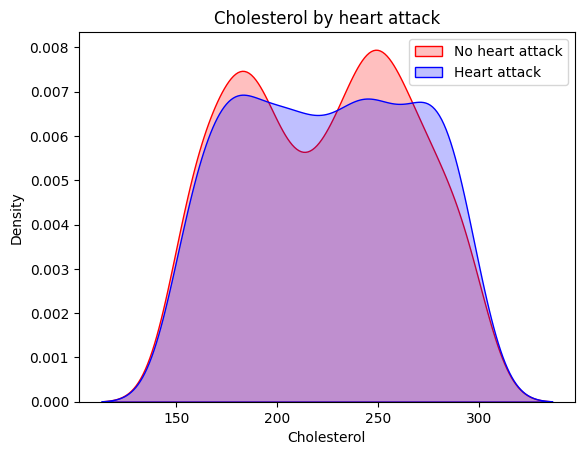

In [28]:
sns.kdeplot(new_dataset_dummy['Cholesterol (mg/dL)'][(new_dataset_dummy['Had_HeartAttack']==0)],color="red",shade=True)
sns.kdeplot(new_dataset_dummy['Cholesterol (mg/dL)'][(new_dataset_dummy['Had_HeartAttack']==1)],color="blue",shade=True)
plt.legend(["No heart attack","Heart attack"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Cholesterol')
plt.title('Cholesterol by heart attack')

There is no significant insight from this graph and might not be the reason for heart attack.

<Axes: >

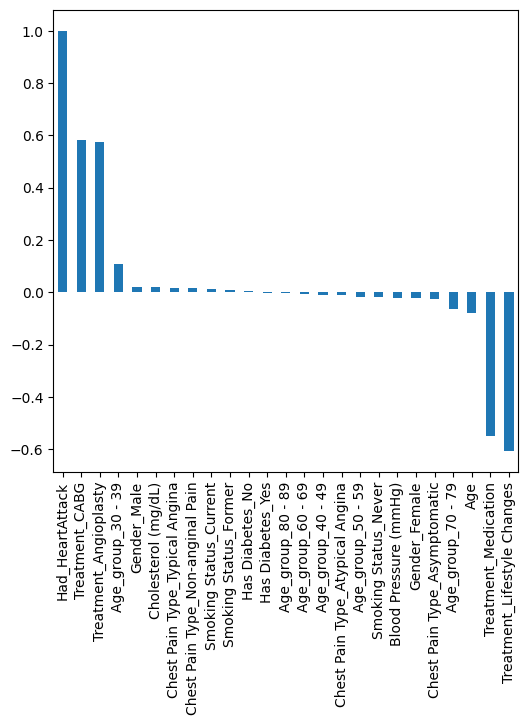

In [29]:
plt.figure(figsize=(6,6))
new_dataset_dummy.corr()['Had_HeartAttack'].sort_values(ascending=False).plot(kind='bar')

*Expected insights*

The insight is, Heart attack is primarily found in age group (30 - 39) comparatively males , with 'Typical angina' and 'Non-anginal' chest pains who needs 'CABG' & 'Angioplasty' treatment.

*Surprising insights*

Cholesterol & Blood pressure (High or Low) didn't contribute for the heart attack.

This is also evident in the heat map.


<Axes: >

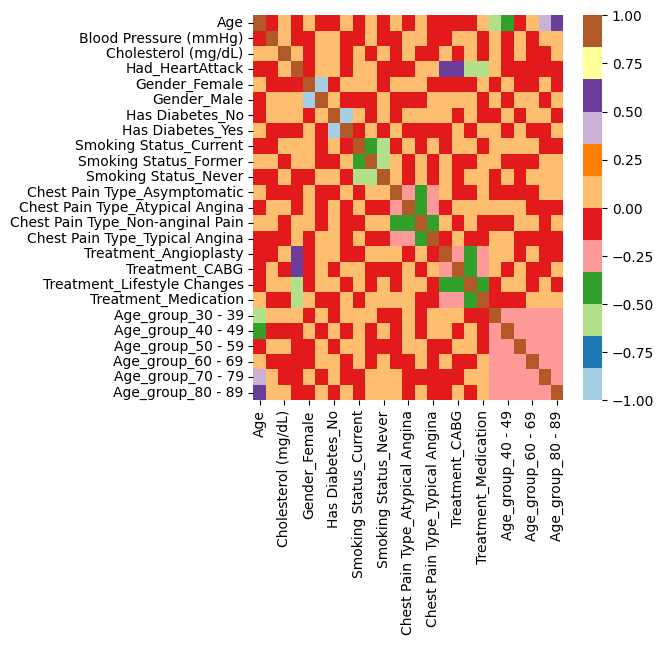

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(new_dataset_dummy.corr(),cmap="Paired")

*CONCLUSION*

1 ) Males patients have experienced more heart attacks than females, but the difference is very minimal.

2 ) Age group (30 - 39) have registered the most heart attack patients.

3 ) *Typical angina* & *Non - anginal* Chest pains were more in number.

4 ) *Coronary Artery Bypass Graft (CABG)* & *Angioplasty* treatment were recommended for heart attack patients.

5 ) Due to lack of proper data, it wasn't evident enough to conclude that *Cholesterol* & *Blood pressure* contributed to heart attack.
